# Grip At The Sparks Foundation Intenship

# Author : Aalliya Pathan

# TASK-4

# Exploratory Data Analysis - Global Terrorism
      (Level - Intermediate)

## Importing all libraries

In [3]:
import pandas as pd         #for fast analysis, data cleaning & preparation
import numpy as np          #linear algebra library for python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [5]:
df = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day',
                   'country_txt':'Country','provstate':'state','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                   'nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},
                    inplace=True)

In [10]:
df=df[['Year','Month','Extended','Day','Country','state','Region','city',
       'latitude','longitude','AttackType','Killed','Wounded','Target',
       'Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [13]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

<AxesSubplot:>

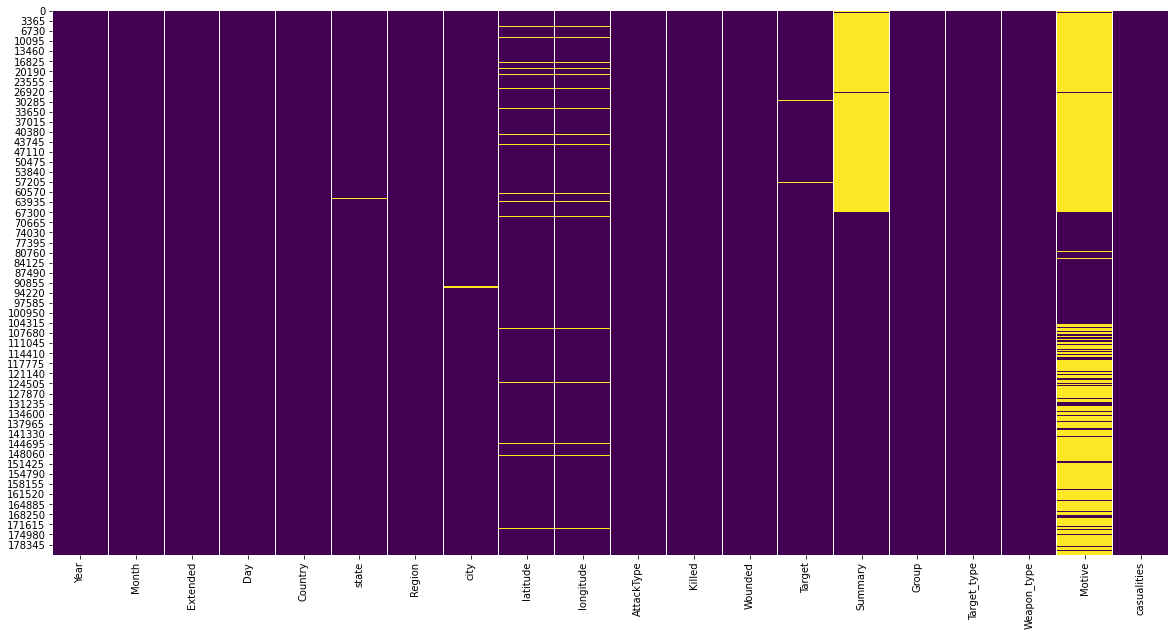

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df. isnull() ,cbar = False , cmap='viridis')

In [16]:
#DESTRUCTIVE FEATURES
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


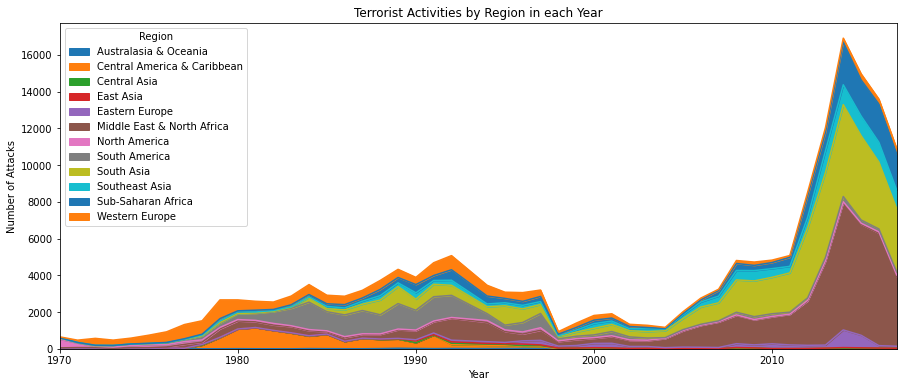

In [17]:
#Terrorist Activities by Region in each Year through Area Plot

pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

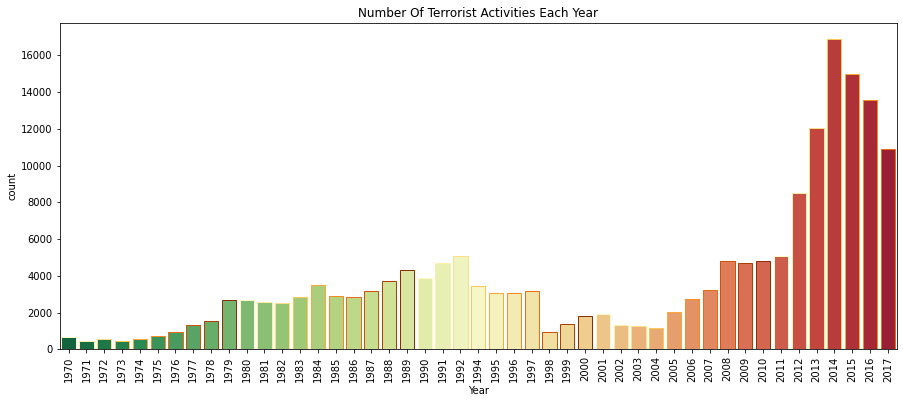

In [25]:
#Number of Terrorist Activities each Year

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [26]:
#History of the Worst Terror Attacks in Heatmap using Plotly

df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [27]:
# Values are sorted by the top 40 worst terror attacks as to keep the heatmap
# simple and easy to visualize

df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [28]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.as_matrix(), x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [30]:
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

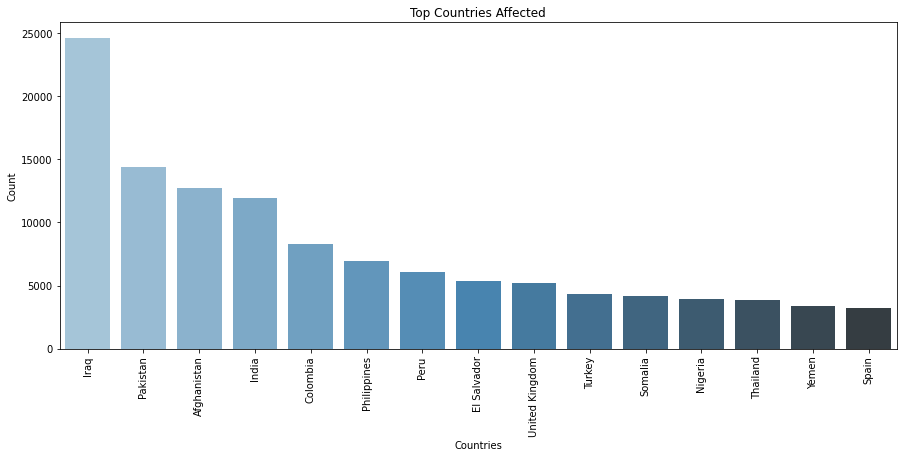

In [31]:

#Top Countries affected by Terror Attacks¶

plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [32]:
#Now to visualize the top four countries that have suffered the most using bubble charts in Plotly¶

terror_df =df[(df['Group'] != 'Unknown') & (df['casualities'] > 50)]
terror_df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,0,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,0,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,0,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,0,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,1,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [33]:
terror_df = terror_df.sort_values(['Region', 'Country'])

In [34]:
#It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster¶

terror_df.isnull().sum()

Year              0
Month             0
Extended          0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [35]:
terror_df = terror_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [36]:
terror_df = terror_df.dropna(subset=['city'])

In [37]:
terror_df.isnull().sum()

Year           0
Month          0
Extended       0
Day            0
Country        0
state          3
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

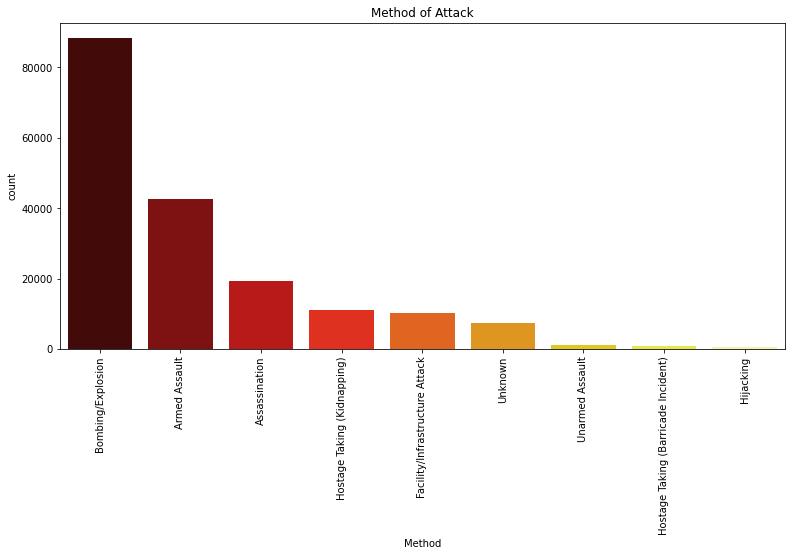

In [38]:
#Methods of attack

plt.figure(figsize=(13,6))
sns.countplot(df['AttackType'],data=df,order=df['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

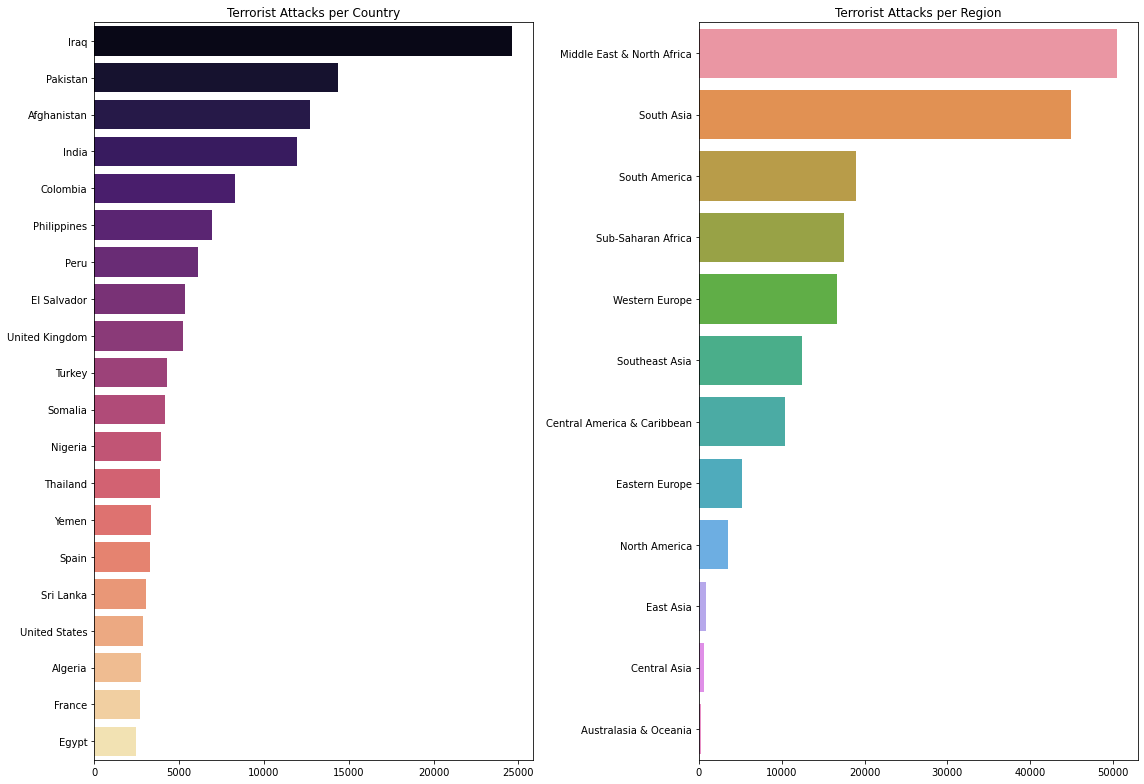

In [39]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

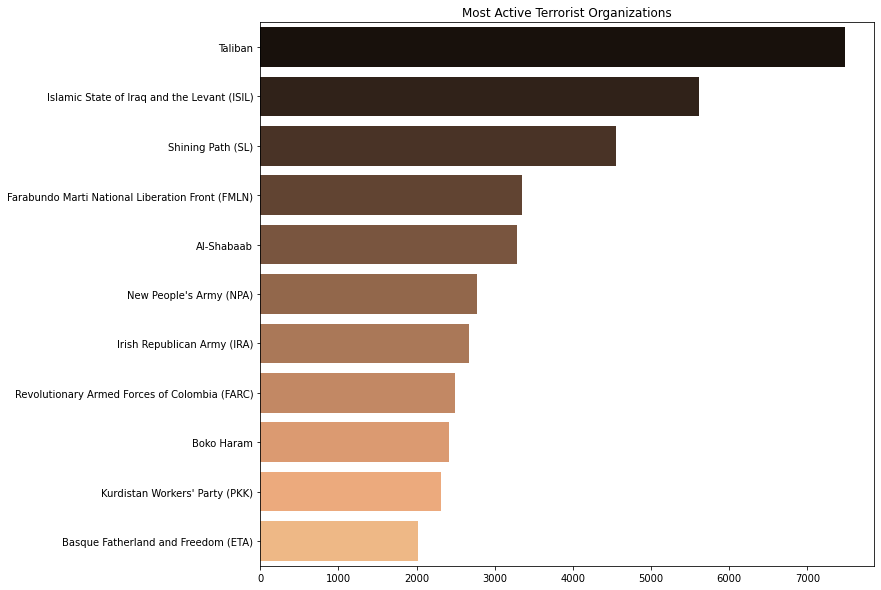

In [40]:
#Most active organizations

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

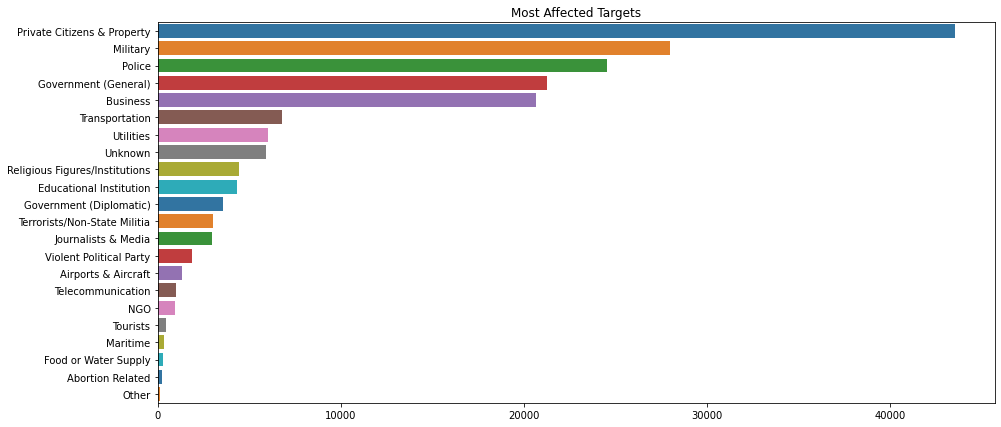

In [41]:
#Most affected targets

plt.subplots(figsize=(15,7))
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

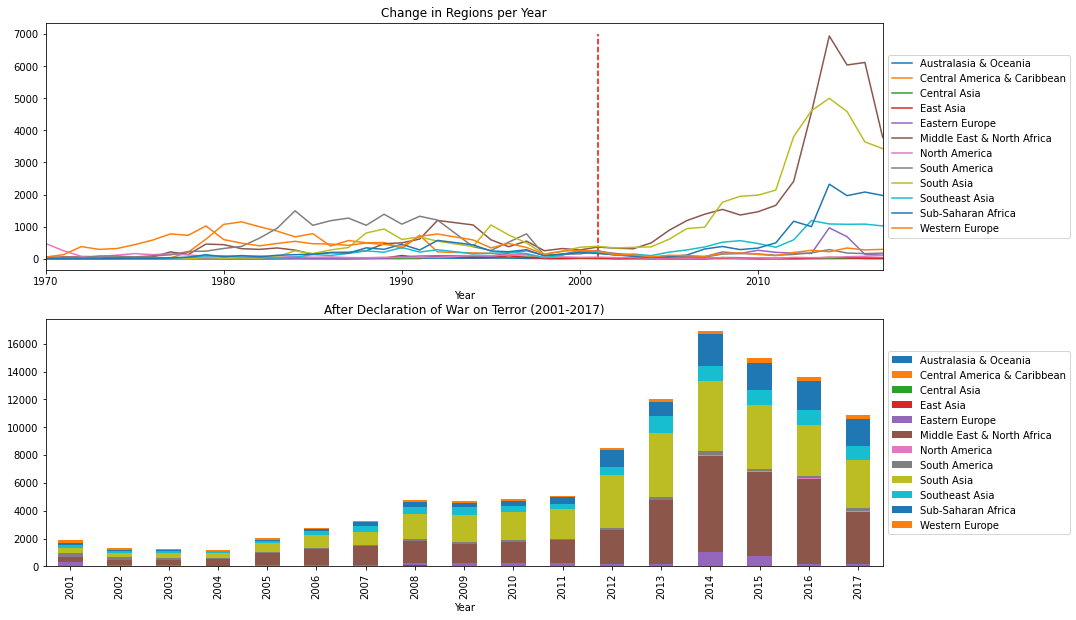

In [42]:
#Before and after the War on Terror

#After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


df_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

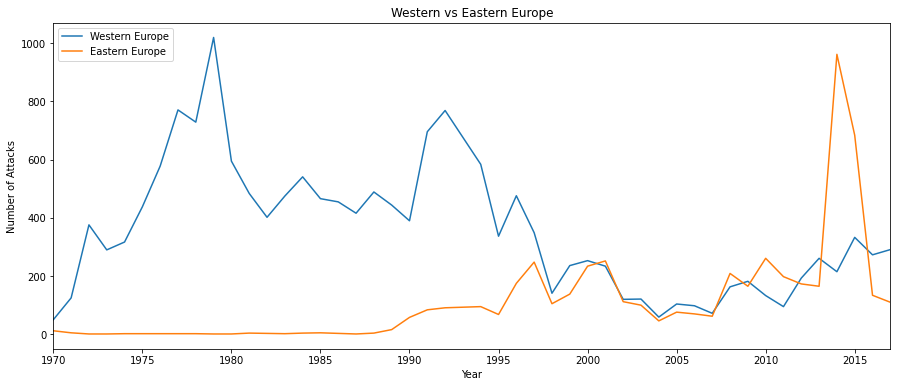

In [43]:
#The shift from Western Europe to Eastern Europe

fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
             df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
             df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

Though Western Europe has seen considerably more terrorism in the past, there is now a shift in activity towards the east. 1991 seems to be a turning point here considering the dissolution of the Soviet Union at the time and the numerous accounts of unrest that followed. The spike at 2014 can be attributed to the recent Ukrainian revolution and related Ukrainian-Russian conflicts such as the war in Donbass. The following plots show the number of Russia and Ukraine's terrorist events compared to the rest of Eastern Europe.

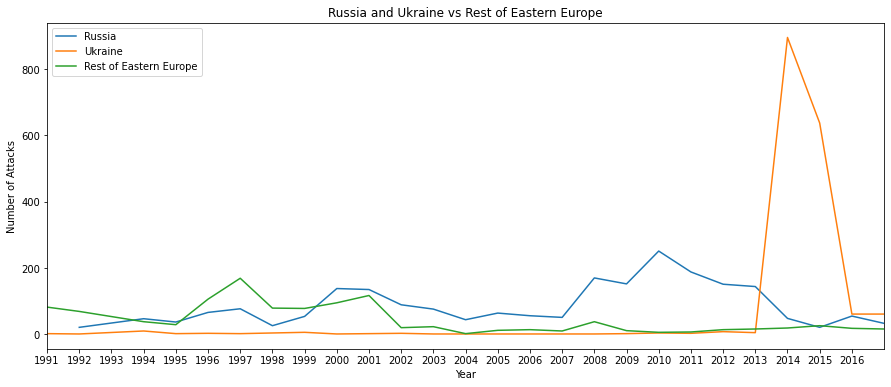

In [44]:

fig,ax = plt.subplots(figsize=(15,6))
russia = df[(df['Country']=='Russia') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukraine = df[(df['Country']=='Ukraine') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east = df[(df['Country']!='Russia') & (df['Country']!='Ukraine')
               & (df['Region']=='Eastern Europe')& (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

Clearly, Russia and Ukraine are the main contributers to this shift. Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple years has been found in Ukraine.

## Are extended attacks more lethal?

Extended attacks are defined as events that last longer than 24 hours. Does a longer timeframe mean a higher rate of casualties? Lets first look at which methods of attack tend to be extended or unextended.

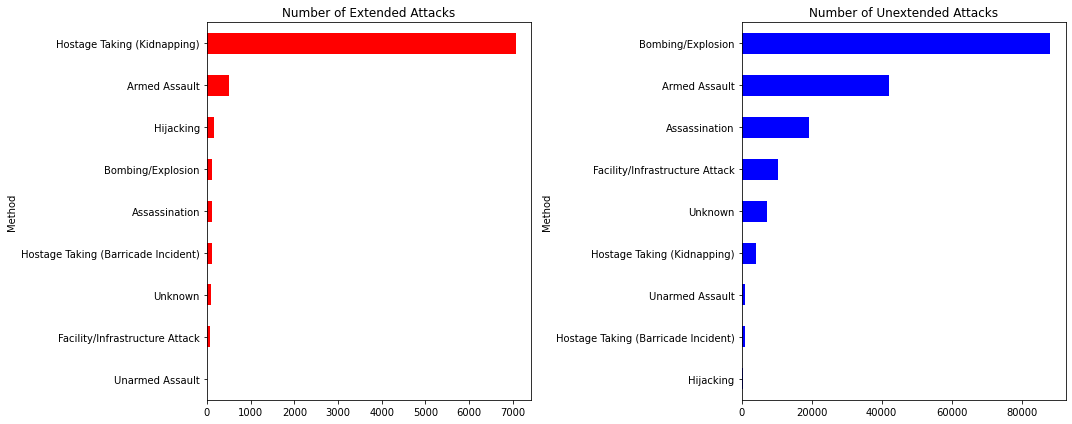

In [45]:

fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

Extended attacks overwhelmingly consist of hostage taking. On the other hand, extended attacks seem to be a bit more spread between bombings/explosions, armed assaults, and assassinations.

### Completed Task 4